<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<br>
<strong>Για το εργαστήριο του μαθήματος "<i>Στοχαστικές Διεργασίες & Βελτιστοποίηση στη Μηχανική Μάθηση</i>" έχουμε προσαρμόσει το κείμενο και τον κώδικα από το παραπάνω βιβλίο στις ανάγκες μας.</strong>

<b>Τρέξτε το Notebook και απαντήστε, <u>συνοπτικά</u>, στις ερωτήσεις. Δε χρειάζεται να βάλετε στην αναφορά σας τα σχήματα.</b>


<h2><b><i>Support Vector Machines</i></b></h2>

Αρχικά, θα φορτώσουμε τις βιβλιοθήκες που είναι απαραίτητες για την άσκηση. Όλες οι βιβλιοθήκες είναι εγκατεστημένες στο Colab.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets.samples_generator import make_circles
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d
import seaborn as sns; sns.set()

Το παρακάτω τμήμα κώδικα δημιουργεί και εμφανίζει δείγματα από 2 clusters με μία δεδομένη τυπική απόκλιση.

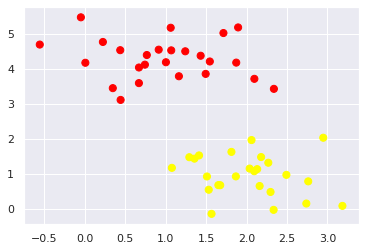

In [2]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Γίνεται εύκολα αντιληπτό ότι οι δύο κατηγορίες μπορούν να διαχωριστούν με ευθείες γραμμές. Στο παρακάτω σχήμα φαίνονται 3 τέτοιες ενδεικτικές γραμμές. 
<ul>
<li><b>Ερώτηση 1:</b> Σε ποια κατηγορία θα ανήκει το test example που φαίνεται στην παρακάτω με εικόνα με το σύμβολο 'Χ' ανάλογα με την ευθεία γραμμή που θα επιλεχθεί; </li>
<li><b>Ερώτηση 2:</b> Γιατί αυτή η μέθοδος διαχωρισμού των κλάσεων ενός ταξινομητή μπορεί να οδηγήσει σε μη επιθυμητά αποτελέσματα;</li>
</ul>

**Απάντηση 1**

Στην περίπτωση της ευθείας με negative slope θα ταξινομηθεί στα κίτρινα, ενώ στην κατηγορία με τις ευθείες που έχουν positive slope θα ταξινομηθούν στην κόκκινη κατηγορία.

**Απάντηση 2**

Ο λόγος που αυτή η μέθοδος δεν επιφέρει επιθυμητά αποτελέσματα είναι πως ενώ αρκετές ευθείες θα μπορούσαν να το ταξινομήσουν σωστά , άπειρες ίσως, μπορεί να έχουν ένα bias προς μια από τις 2 κατηγορίες, όπως στο παράδειγμα μας με την ευθεία με το μεγαλύτερο positive slope που μεροληπτεί υπέρ της κίτρινης κατηγορίας λίγο παραπάνω. Επομένως αυτό που φοβόμαστε είναι πως ναι μεν μπορεί να ταξινομηθούν σωστά τα δείγματα αλλά αυτή να μην είναι η optimal ευθεία και να υπάρχει πρόβλημα όταν επαληθεύουμε σε ένα test sample.

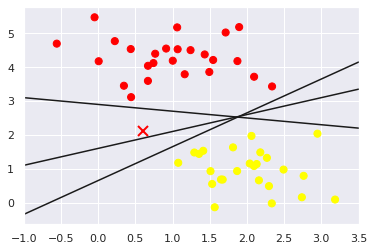

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Στην περίπτωση του ταξινομητή SVM το πρόβλημα αυτό επιλύεται με τον παρακάτω τρόπο: Αντί να τραβήξουμε μία γραμμή μηδενικού πλάτους ανάμεσα στις δύο κλάσεις, τραβάμε μία γραμμή με περιθώρια (margins) στις δύο πλευρές της. Η μέθοδος αυτή για τις γραμμές του προηγούμενου προβλήματος φαίνονται στην παρακάτω εικόνα. 
<ul>
<li><b>Ερώτηση 3:</b> Ποιος περιορισμός ισχύει για τα περιθώρια της εκάστοτε γραμμής;</li>
<li><b>Ερώτηση 4:</b> Με ποιο κριτήριο επιλέγεται η καλύτερη γραμμή;</li>
</ul>

**Aπάντηση 3**

Σύμφωνα με τον αλγόριθμο svm βρίσκουμε τα σημεία που είναι πιο κοντά στην γραμμή και στις 2 κλάσεις. Αυτά τα διανύσματα λέγονται διανύσματα υποστήριξης και υπολογίζουμε την απόσταση τους από την ευθεία. Αυτή η απόσταση καλείται margin-περιθώριο. O στόχος μας είναι να μεγιστοποιήσουμε αυτό το margin.  Στην παρακάτω εικόνα παρατηρούμε πως εφόσον έχει οριστεί το margin μετά διαλέγεται μια ευθεία ακριβώς στη μέση του περιθωρίου από οπου η ευθεία των support vectors της κάθε κλάσεις ισαπέχει.

<img align="left" style="padding-right:10px;" src="https://miro.medium.com/max/1280/1*irg_jfdAar9gfe0j-Q04vQ.png">

**Απάντηση 4**

Το κριτήριο της επιλογής της διαχωριστικής γραμμής είναι αυτή που μεγιστοποιεί το περιθώριο μεταξύ των support vectors των 2 κλάσεων.

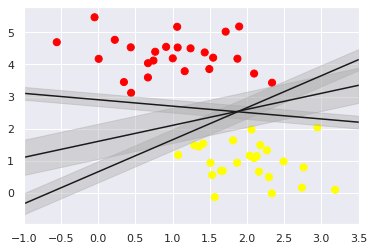

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### Εκπαίδευση του Μοντέλου

Χρησιμοποιώντας το πακέτο Scikit-Learn θα εκπαιδεύσουμε τον αλγόριθμο SVM πάνω στα δεδομένα του προηγούμενου προβλήματος, χρησιμοποιώντας γραμμικό πυρήνα.

In [5]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Με την παρακάτω μέθοδο θα εμφανιστεί στο σχήμα που ακολουθεί η βέλτιστη γραμμή διαχωρισμού των δύο κατηγοριών, καθώς και τα περιθώριά της. Τα training examples που ακουμπούν πάνω στα όρια ονομάζονται Support Vectors.

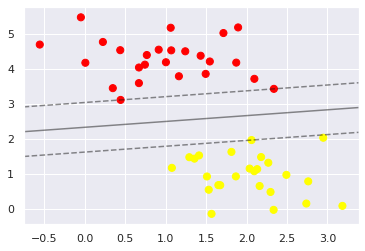

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

Στο ακόλουθο σχήμα, η διαδικασία επαναλαμβάνεται για δύο datasets που περιλαμβάνουν 60 και 120 training examples αντίστοιχα. 
<ul>
<li><b>Ερώτηση 5:</b> Τι παρατηρείτε σχετικά με τη βέλτιστη γραμμή που διαχωρίζει τις δύο κατηγορίες και τα περιθώριά της;</li>
<li><b>Ερώτηση 6:</b>Τι αρκεί να κάνει ο αλγόριθμος για να ταξινομήσει νέα δεδομένα που θα λάβει στην είσοδό του;</li>
</ul>

**Απάντηση 5**

Στο αριστερό plot βλέπουμε το μοντέλο και τα διανύσματα υποστήριξης για 60 σημεία και στο δεξιά για 120. Παρατηρούμε πως παρά την αύξηση τα 2 μοντέλα δεν έχουν αλλάξει και αυτό δείχνει την σταθερότητα του μοντέλου svm και το πόσο ισχυρό μοντέλο είναι.

**Απάντηση 6**

Ο αλγόριθμος για να ταξινομήσει ένα δείγμα κοιτάζει να δει σε ποια μεριά της optimal ευθείας στη μέση του margin ανήκει το δείγμα. Ουσιαστικά αν αυτό το γινόμενο βγει αρνητικό πάει στην μια κλάση αλλιώς αν είναι θετικό ταξινομείται στην άλλη.

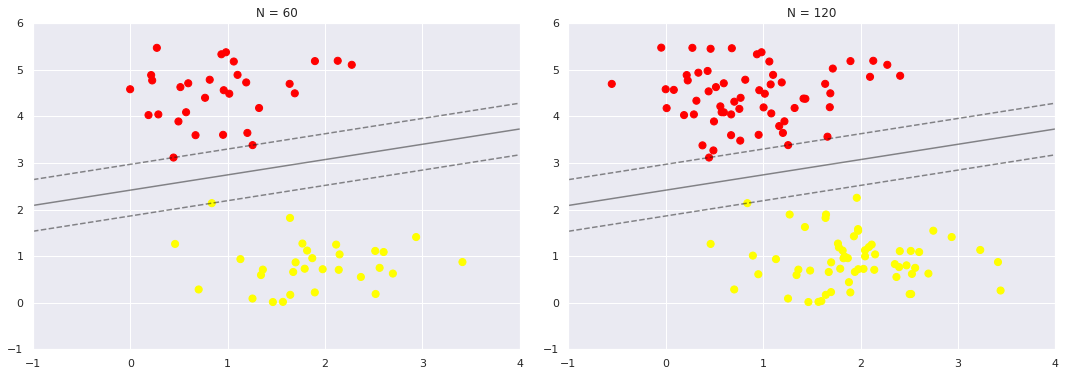

In [7]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

### Μη Γραμμικά Διαχωρίσιμες Κατηγορίες: Kernel SVM

Στην περίπτωση που οι κατηγορίες του προβλήματος δεν είναι γραμμικά διαχωρίσιμες, ο αλγόριθμος SVM χρησιμοποιεί μη γραμμικούς πυρήνες (kernels) για να προβάλει τα δεδομένα εκπαίδευσης σε μεγαλύτερη διάσταση όπου μπορεί να τα καταστήσει γραμμικά διαχωρίσιμα. Μία τέτοια περίπτωση δεδομένων εκπαίδευσης παρουσιάζεται στο επόμενο σχήμα.

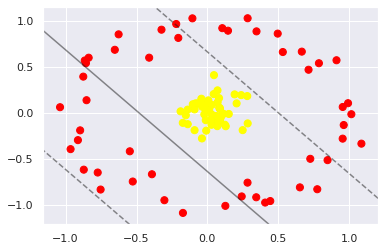

In [8]:
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Είναι φανερό ότι τα δεδομένα εκπαίδευσης δεν μπορούν να διαχωριστούν γραμμικά. Στο επόμενο σχήμα φαίνεται η προβολή τους στις τρεις διαστάσεις με τη χρήση ενός μη γραμμικού πυρήνα. 
<ul>
<li><b>Ερώτηση 7:</b> Τι είδους πυρήνας χρησιμοποιήθηκε;</li>
<li><b>Ερώτηση 8:</b> Δώστε ένα παράδειγμα γραμμικού ορίου που θα μπορούσε να διαχωρίσει τις δύο κατηγορίες.</li>
</ul>

**Απάντηση 7** 

Ο πυρήνας που χρησιμοποιήθηκε είναι ένας radial basis function με κέντρο τη μεσαία συστάδα. Η συνάρτηση της φαίνεται στο σημείο του κώδικα που ορίζουμε:  r = np.exp(-(X ** 2).sum(1)).

**Απάντηση 8**

Πλέον εφόσον οι κλάσεις μας είναι γραμμικά διαχωρίσιμες θα μπορούσαμε εύκολα να φέρουμε ένα linear boundary(hyperplane) για το διαχωρισμό των κλάσεων, όπως κάνουν τα svm για παράδειγμα.


In [9]:
r = np.exp(-(X ** 2).sum(1))

In [11]:
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

Η εύρεση του πυρήνα που μπορεί να διαχωρίσει με τον καλύτερο τρόπο τα δεδομένα απαιτεί, συνήθως, πολλούς υπολογισμούς. 
<ul>
<li><b>Ερώτηση 9:</b> Ποια μέθοδος μπορεί να βοηθήσει σε αυτό και πώς; (hint: <a href="https://en.wikipedia.org/wiki/Kernel_trick">Kernel Trick</a>)</li>
</ul>

**Απάντηση 9**

Όντως η εύρεση του πυρήνα είναι πολύ χρονοβόρα. Ωστόσο, εξαιτίας μιας απλής διαδικασίας που λέγεται kernel trick, το fit στα kernel transformed δεδομένα μπορεί να γίνει με ένα τρόπο που δεν είναι εμφανής. Δηλαδή δε θα φτιάξουμε ποτέ N - dimensional δεδομένα αν θέλουμε να κάνουμε κάποια δείγματα διάστασης d project σε ένα χωρο N. Aυτό ονομάζεται kernel trick και είναι ενσωματωμένο στην εξίσωση του svm. Aυτή η μέθοδος είναι που κάνει το svm μοντέλο τόσο ισχυρό. Όπως, βλέπουμε και στο παρακάτω σχήμα, με τη χρήση ενός rbf kernel καταφέραμε να φτιάξουμε ένα μη γραμμικό ταξινομητή.

----------------------------------------------------------------------------
Παρακάτω γίνεται η εκπαίδευση του αλγορίθμου SVM με μη γραμμικό πυρήνα.

/home/zerkes/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


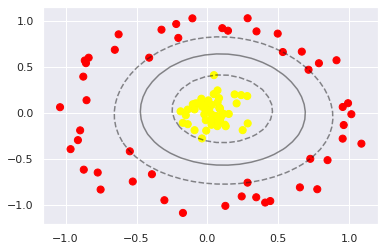

In [12]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');